<a href="https://colab.research.google.com/github/bainaryho/AiPrograming/blob/master/word_test_1119.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

과제) 네이버 뉴스에서 본인이 선택한 검색어로 검색 한 결과를 json으로 저장 한 후    
1) 적절하지 않은 단어를 제거 한 후   
2) 단어 빈도수 기준으로 histogram 생성  
3) word cloud 생성.   

아래 code를 변형 하여 사용.   
가능 하면 본인의 client id와 client secret 사용 할 것. 2주차 과제에 업로드 된 code확인


In [ ]:
import os
import sys
import urllib.request
import datetime
import time
import json

#client_id = '9DJjN_UoiVw9xsNrcWAG'
#client_secret = '6qEKmlidPH'

client_id = '9DJjN_UoiVw9xsNrcWAG'
client_secret = '6qEKmlidPH'



#[CODE 1]
def getRequestUrl(url):    
    req = urllib.request.Request(url)
    req.add_header("X-Naver-Client-Id", client_id)
    req.add_header("X-Naver-Client-Secret", client_secret)
    
    try: 
        response = urllib.request.urlopen(req)
        if response.getcode() == 200:
            print ("[%s] Url Request Success" % datetime.datetime.now())
            return response.read().decode('utf-8')
    except Exception as e:
        print(e)
        print("[%s] Error for URL : %s" % (datetime.datetime.now(), url))
        return None

#[CODE 2]
def getNaverSearch(node, srcText, start, display):    
    base = "https://openapi.naver.com/v1/search"
    node = "/%s.json" % node
    parameters = "?query=%s&start=%s&display=%s" % (urllib.parse.quote(srcText), start, display)
    
    url = base + node + parameters    
    responseDecode = getRequestUrl(url)   #[CODE 1]
    
    if (responseDecode == None):
        return None
    else:
        return json.loads(responseDecode)

#[CODE 3]
def getPostData(post, jsonResult, cnt):    
    title = post['title']
    description = post['description']
    org_link = post['originallink']
    link = post['link']
    
    pDate = datetime.datetime.strptime(post['pubDate'],  '%a, %d %b %Y %H:%M:%S +0900')
    pDate = pDate.strftime('%Y-%m-%d %H:%M:%S')
    
    jsonResult.append({'cnt':cnt, 'title':title, 'description': description, 
'org_link':org_link,   'link': org_link,   'pDate':pDate})
    return    

#[CODE 0]
def main():
    node = 'news'   # 크롤링 할 대상
    srcText = input('검색어를 입력하세요: ')
    cnt = 0
    jsonResult = []

    jsonResponse = getNaverSearch(node, srcText, 1, 100)  #[CODE 2]
    total = jsonResponse['total']
 
    while ((jsonResponse != None) and (jsonResponse['display'] != 0)):         
        for post in jsonResponse['items']:
            cnt += 1
            getPostData(post, jsonResult, cnt)  #[CODE 3]       
        
        start = jsonResponse['start'] + jsonResponse['display']
        jsonResponse = getNaverSearch(node, srcText, start, 100)  #[CODE 2]
       
    print('전체 검색 : %d 건' %total)
    
    with open('%s_naver_%s.json' % (srcText, node), 'w', encoding='utf8') as outfile:
        jsonFile = json.dumps(jsonResult,  indent=4, sort_keys=True,  ensure_ascii=False)
                        
        outfile.write(jsonFile)
        
    print("가져온 데이터 : %d 건" %(cnt))
    print ('%s_naver_%s.json SAVED' % (srcText, node))
    
if __name__ == '__main__':
    main()


검색어를 입력하세요: 아스날
[2022-11-23 01:28:15.050687] Url Request Success
[2022-11-23 01:28:16.391115] Url Request Success
[2022-11-23 01:28:17.694353] Url Request Success
[2022-11-23 01:28:18.985698] Url Request Success
[2022-11-23 01:28:20.329595] Url Request Success
[2022-11-23 01:28:21.609344] Url Request Success
[2022-11-23 01:28:22.929485] Url Request Success
[2022-11-23 01:28:24.241833] Url Request Success
[2022-11-23 01:28:25.557116] Url Request Success
[2022-11-23 01:28:26.890801] Url Request Success
HTTP Error 400: Bad Request
[2022-11-23 01:28:27.905335] Error for URL : https://openapi.naver.com/v1/search/news.json?query=%EC%95%84%EC%8A%A4%EB%82%A0&start=1001&display=100
전체 검색 : 74942 건
가져온 데이터 : 1000 건
아스날_naver_news.json SAVED


In [ ]:
#  폰트 설치
import matplotlib.font_manager as fm

!apt-get -qq -y install fonts-nanum > /dev/null
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
fm._rebuild()

In [ ]:
#런타임 재시작
import os
os.kill(os.getpid(), 9)

In [ ]:
#  폰트 설정
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.font_manager as fm

# 마이너스 표시 문제
mpl.rcParams['axes.unicode_minus'] = False
	
# 한글 폰트 설정
path = '/usr/share/fonts/truetype/nanum/NanumGothicBold.ttf'
font_name = fm.FontProperties(fname=path, size=18).get_name()
plt.rc('font', family=font_name)
fm._rebuild()

In [ ]:
%%bash
apt-get update
apt-get install g++ openjdk-8-jdk python-dev python3-dev
pip3 install JPype1
pip3 install konlpy

Get:1 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Get:2 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Ign:3 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:4 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:5 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease [1,581 B]
Hit:6 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:7 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Get:8 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Hit:9 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Get:10 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [83.3 kB]
Hit:11 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease
Hit:12 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease
Get:13 http://security.ubuntu.c

In [ ]:
%env JAVA_HOME "/usr/lib/jvm/java-8-openjdk-amd64"

env: JAVA_HOME="/usr/lib/jvm/java-8-openjdk-amd64"


# 8장. 텍스트빈도분석 - 2) 한글 단어 분석 

## 한글 단어 분석을 위한 패키지 준비

In [ ]:
import json
import re

from konlpy.tag import Okt

from collections import Counter

import matplotlib
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
from wordcloud import WordCloud

# 1. 데이터 준비

### 1-1. 파일 읽기

In [ ]:
inputFileName = '/content/아스날_naver_news'
data = json.loads(open(inputFileName+'.json', 'r', encoding='utf-8').read())
data #출력하여 내용 확인

[{'cnt': 1,
  'description': '앞서 잉글랜드가 2000년대생인 주드 벨링엄(도르트문트), 부카요 사카(<b>아스날</b>)를 이란전에서 주전으로 기용,\xa0세대교체 성공을 증명했다. 역시 세계 최고 수준의 리그(라리가)를 보유한 스페인도 기대하는 그림이다.... ',
  'link': 'http://www.sportsq.co.kr/news/articleView.html?idxno=446303',
  'org_link': 'http://www.sportsq.co.kr/news/articleView.html?idxno=446303',
  'pDate': '2022-11-23 09:12:00',
  'title': '독일-일본 주목, 시간도 최적 [오늘의 월드컵]'},
 {'cnt': 2,
  'description': '일본 축구국가대표팀 수비수 도미야스 다케히로(24, <b>아스날</b>)가 인터뷰 중 머쓱한 상황을 연출했다. 도미야스는 23일(한국시간) 스페인 &apos;아스&apos;와 인터뷰에서 &apos;좋아하는 스페인 국가대표팀 선수가 누구냐&apos;는 질문을 받았다.... ',
  'link': 'http://www.osen.co.kr/article/G1111994522',
  'org_link': 'http://www.osen.co.kr/article/G1111994522',
  'pDate': '2022-11-23 03:22:00',
  'title': '&quot;알칸타라가 안왔다고? 몰랐는데..&quot; 머쓱해진 日 도미야스'},
 {'cnt': 3,
  'description': '-도미야스 다케히로(24, <b>아스날</b>)를\xa0평가하자면? 앞서 말했지만, 우리는 많이 발전했다. 게속 발전하고 있다.\xa0많은 선수들이 유럽에서 뛰고 있다. 프리미어리그는 터프한 리그다.\xa0새로운 세대들이 프리미어리그에서 뛰는... ',
  'link': 'http://www.osen.co.kr/article/G11119

### 1-2. 분석할 데이터 추출

In [ ]:
message = ''

for item in data:
#    if 'message' in item.keys(): 
#        message = message + re.sub(r'[^\w]', ' ', item['message']) +''
    if 'description' in item.keys(): 
        message = message + re.sub(r'[^\w]', ' ', item['description']) +''
        
message #출력하여 내용 확인

'앞서 잉글랜드가 2000년대생인 주드 벨링엄 도르트문트   부카요 사카  b 아스날  b  를 이란전에서 주전으로 기용  세대교체 성공을 증명했다  역시 세계 최고 수준의 리그 라리가 를 보유한 스페인도 기대하는 그림이다     일본 축구국가대표팀 수비수 도미야스 다케히로 24   b 아스날  b  가 인터뷰 중 머쓱한 상황을 연출했다  도미야스는 23일 한국시간  스페인  apos 아스 apos 와 인터뷰에서  apos 좋아하는 스페인 국가대표팀 선수가 누구냐 apos 는 질문을 받았다      도미야스 다케히로 24   b 아스날  b  를 평가하자면  앞서 말했지만  우리는 많이 발전했다  게속 발전하고 있다  많은 선수들이 유럽에서 뛰고 있다  프리미어리그는 터프한 리그다  새로운 세대들이 프리미어리그에서 뛰는    잉글랜드 공격의 희망으로 떠오른 주드 벨링엄 19 도르트문트 과 부카요 사카 21  b 아스날  b   듀오  측면을 휘저은 래힘 스털링 28 첼시 과 마커스 래시포드 25 맨체스터 유나이티드 의 활약이 빛났지만 이날 경기의 백미는    EPL 명문  b 아스날  b  소속인 사카는 전반 43분 해리 매과이어 맨체스터 유나이티드 의 헤더 패스를 받아 왼발 슛으로 연결해 추가 골을 만들어냈다  사카는 후반 17분에도 왼발 슛으로 이란 골대를 흔들었다  21세 77일의    대표적인 예가  b 아스날  b 에서 활약 중인 토마스 파티  게임상 파티의 국적은 가나로 되어있지만 국가대표팀 승선은 늦어졌다   apos 피파 온라인 4 apos  게임 안에서 이냐키 윌리암스와 라틱 람프티는 각각 스페인  잉글랜드 국적자로    윌리엄 살리바  b 아스날  b    오렐리앵 추아메니  에두아르도 카마빙가 이상 레알 마드리드  등 촉망받는 신예들도 적지 않다  데샹 감독 역시 자신 있는 모습이었다  그는 호주전을 앞두고 기자회견에 참석해  quot 우리는 언제나    메흐디 타레미 30  포르투 가 멀티골을 뽑았지만 전반에만 주드 벨링엄 도르트문트   

### 1-3. 품사 태깅 : 명사 추출

In [ ]:
nlp = Okt()
message_N = nlp.nouns(message)
message_N   #출력하여 내용 확인

['앞서',
 '잉글랜드',
 '주드',
 '벨링',
 '엄',
 '도르트문트',
 '부',
 '카요',
 '사카',
 '아스날',
 '를',
 '이란',
 '전',
 '주전',
 '기용',
 '세대',
 '교체',
 '성공',
 '증명',
 '역시',
 '세계',
 '최고',
 '수준',
 '리그',
 '라리가',
 '를',
 '보유',
 '스페인',
 '그림',
 '일본',
 '축구',
 '국가대표팀',
 '수비수',
 '도미',
 '야스',
 '다케히',
 '아스날',
 '인터뷰',
 '중',
 '상황',
 '연출',
 '도미',
 '야스',
 '한국',
 '시간',
 '스페인',
 '아스',
 '인터뷰',
 '스페인',
 '국가대표팀',
 '선수',
 '누구',
 '질문',
 '도미',
 '야스',
 '다케히',
 '아스날',
 '를',
 '평가',
 '앞서',
 '말',
 '우리',
 '발전',
 '게속',
 '발전',
 '선수',
 '유럽',
 '프리미어리그',
 '터프',
 '리그',
 '세대',
 '프리미어리그',
 '잉글랜드',
 '공격',
 '희망',
 '주드',
 '벨링',
 '엄',
 '도르트문트',
 '과',
 '부',
 '카요',
 '사카',
 '아스날',
 '듀오',
 '측면',
 '휘',
 '은',
 '힘',
 '스털링',
 '첼시',
 '과',
 '마커스',
 '래시',
 '포드',
 '맨체스터',
 '유나이티드',
 '의',
 '활약',
 '날',
 '경기',
 '백미',
 '명문',
 '아스날',
 '소속',
 '사카',
 '전반',
 '해리',
 '매',
 '맨체스터',
 '유나이티드',
 '의',
 '헤더',
 '패스',
 '왼발',
 '슛',
 '추가',
 '골',
 '사카',
 '후반',
 '왼발',
 '슛',
 '이란',
 '골대',
 '세',
 '대표',
 '예',
 '아스날',
 '활약',
 '중인',
 '토마스',
 '파티',
 '게임상',
 '파티',
 '국적',
 '가나',
 '국가대표팀',
 '승선',
 '

## 2. 데이터 탐색

### 2-1. 단어 빈도 탐색

In [ ]:
count = Counter(message_N)

count   #출력하여 내용 확인

Counter({'앞서': 19,
         '잉글랜드': 119,
         '주드': 9,
         '벨링': 11,
         '엄': 11,
         '도르트문트': 12,
         '부': 34,
         '카요': 30,
         '사카': 54,
         '아스날': 1541,
         '를': 53,
         '이란': 9,
         '전': 237,
         '주전': 18,
         '기용': 4,
         '세대': 2,
         '교체': 24,
         '성공': 8,
         '증명': 1,
         '역시': 19,
         '세계': 19,
         '최고': 32,
         '수준': 8,
         '리그': 235,
         '라리가': 8,
         '보유': 4,
         '스페인': 29,
         '그림': 2,
         '일본': 15,
         '축구': 63,
         '국가대표팀': 9,
         '수비수': 44,
         '도미': 24,
         '야스': 39,
         '다케히': 16,
         '인터뷰': 13,
         '중': 33,
         '상황': 25,
         '연출': 2,
         '한국': 209,
         '시간': 199,
         '아스': 2,
         '선수': 93,
         '누구': 3,
         '질문': 1,
         '평가': 15,
         '말': 27,
         '우리': 20,
         '발전': 5,
         '게속': 1,
         '유럽': 48,
         '프리미어리그': 268,
         

In [ ]:
word_count = dict()

#for tag, counts in count.most_common(80):
for tag, counts in count.most_common(70):  
    if(len(str(tag))>1):
        word_count[tag] = counts
        print("%s : %d" % (tag, counts))

아스날 : 1541
토트넘 : 582
경기 : 490
승점 : 423
손흥민 : 274
프리미어리그 : 268
런던 : 268
리그 : 235
맨체스터 : 224
한국 : 209
영국 : 204
시간 : 199
시즌 : 183
선두 : 173
지난 : 164
라운드 : 163
시티 : 159
감독 : 147
맨시티 : 144
더비 : 131
리버풀 : 125
첼시 : 124
스타디움 : 122
잉글랜드 : 119
기록 : 117
유나이티드 : 112
승리 : 99
맨유 : 94
선수 : 93
활약 : 74
오후 : 70
케인 : 69
득점 : 68
콘테 : 67
에미레이츠 : 66
출전 : 65
이번 : 65
대결 : 65
원정 : 64
축구 : 63
선발 : 62
패배 : 62
레스터 : 61
라이벌 : 61
상대로 : 60
파티 : 59
공격수 : 56
부상 : 55
사카 : 54
해리 : 54


In [ ]:
print(word_count)

{'아스날': 1541, '토트넘': 582, '경기': 490, '승점': 423, '손흥민': 274, '프리미어리그': 268, '런던': 268, '리그': 235, '맨체스터': 224, '한국': 209, '영국': 204, '시간': 199, '시즌': 183, '선두': 173, '지난': 164, '라운드': 163, '시티': 159, '감독': 147, '맨시티': 144, '더비': 131, '리버풀': 125, '첼시': 124, '스타디움': 122, '잉글랜드': 119, '기록': 117, '유나이티드': 112, '승리': 99, '맨유': 94, '선수': 93, '활약': 74, '오후': 70, '케인': 69, '득점': 68, '콘테': 67, '에미레이츠': 66, '출전': 65, '이번': 65, '대결': 65, '원정': 64, '축구': 63, '선발': 62, '패배': 62, '레스터': 61, '라이벌': 61, '상대로': 60, '파티': 59, '공격수': 56, '부상': 55, '사카': 54, '해리': 54}


In [ ]:
del word_count['아스날']
del word_count['경기']
del word_count['승점']
del word_count['리그']
del word_count['시간']
del word_count['지난']

KeyError: ignored

In [ ]:
print(word_count)

{'토트넘': 582, '손흥민': 274, '프리미어리그': 268, '런던': 268, '맨체스터': 224, '한국': 209, '영국': 204, '시즌': 183, '선두': 173, '지난': 164, '라운드': 163, '시티': 159, '감독': 147, '맨시티': 144, '더비': 131, '리버풀': 125, '첼시': 124, '스타디움': 122, '잉글랜드': 119, '기록': 117, '유나이티드': 112, '승리': 99, '맨유': 94, '선수': 93, '활약': 74, '오후': 70, '케인': 69, '득점': 68, '콘테': 67, '에미레이츠': 66, '출전': 65, '이번': 65, '대결': 65, '원정': 64, '축구': 63, '선발': 62, '패배': 62, '레스터': 61, '라이벌': 61, '상대로': 60, '파티': 59, '공격수': 56, '부상': 55, '사카': 54, '해리': 54}


### 히스토그램

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 53664 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 53944 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45336 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49552 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 55141 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48124 missing from current font.
  font.set_

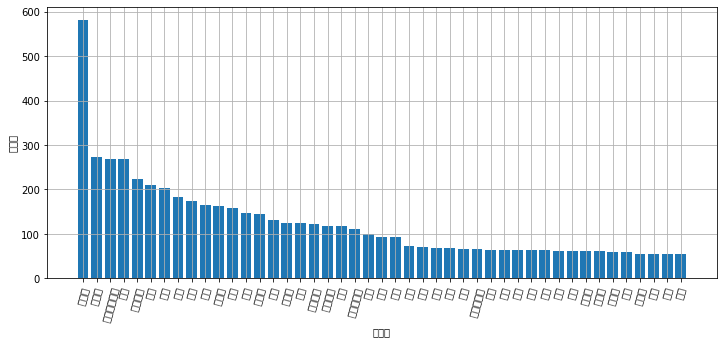

In [ ]:
plt.figure(figsize=(12,5))
plt.xlabel('키워드')
plt.ylabel('빈도수')
plt.grid(True)

sorted_Keys = sorted(word_count, key=word_count.get, reverse=True)
sorted_Values = sorted(word_count.values(), reverse=True)

plt.bar(range(len(word_count)), sorted_Values, align='center')
plt.xticks(range(len(word_count)), list(sorted_Keys), rotation='75')

plt.show()

### 워드클라우드

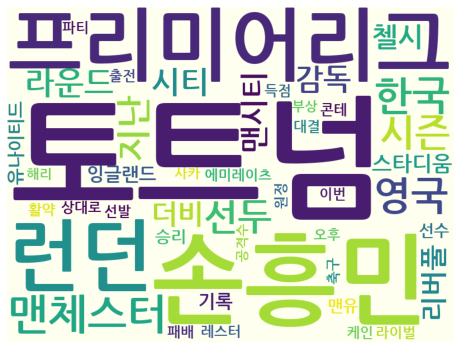

In [ ]:
wc = WordCloud(path, background_color='ivory', width=800, height=600)
cloud=wc.generate_from_frequencies(word_count)

plt.figure(figsize=(8,8))
plt.imshow(cloud)
plt.axis('off')
plt.show()

In [ ]:
cloud.to_file(inputFileName + '_cloud.jpg')